# <u>Categorical Data Plots.

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

1) barplot
2) countplot
3) boxplot
4) violinplot
5) stripplot
6) swarmplot
7) catplot

Let's go through examples of each!

---

# <u>Imports.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---

# <u>Data to plot.

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


---

# 1) <u>barplot and countplot

These are very similar plots, they allows us to get aggregate data off a categorical feature in our data. 

### i) ***barplot***

***Bar Plot in General (Statistics / Visualization):***

- A bar plot is simply a way to represent categorical data with rectangular bars.

- Each bar’s length/height shows the value (count, frequency, percentage, or another metric).

- X-axis (horizontal axis): usually shows categories (like fruits, countries, departments).

- Y-axis (vertical axis): shows the values (like counts, percentages, averages).

- Bars: length/height represents the value.

- Example: Favorite Fruit Survey

    - Suppose 50 people were asked their favorite fruit. The results are:

          Apple: 15
          Banana: 10
          Orange: 20
          Mango: 5

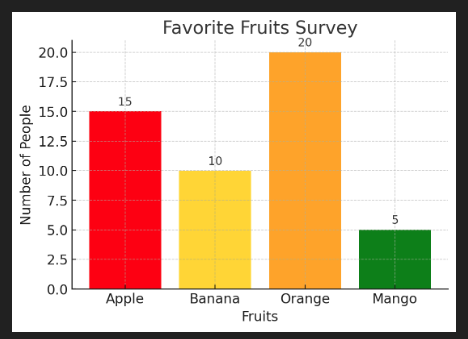

***Seaborn barplot()***

- ***barplot allows us to aggregate the categorical data based off some function, by default the mean:***
- ***We can almost think of this as a visualization of a groupby mechanism.***

***Syntax: sns.barplot(x = 'categorical_col', y = 'numeric_col', data = DataFrame, estimator)***

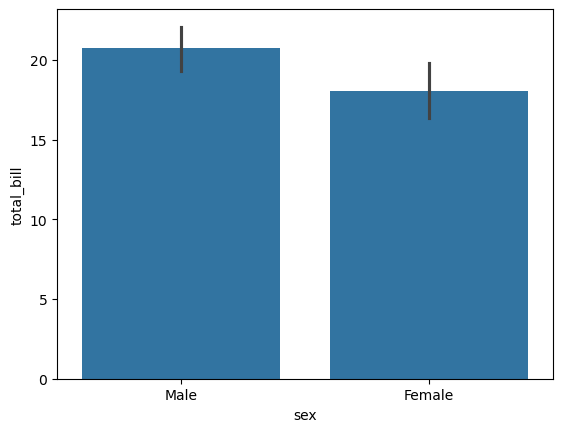

In [3]:
sns.barplot(x = 'sex', y = 'total_bill', data = tips)

plt.show()

- <u>NOTE:

    - On Y-axis:

        - For each category (Male, Female), it takes all the corresponding total_bill values.
        - By default, it computes the mean of those values.

***estimator parameter:***

- ***estimator object = Statistical function to estimate within each categorical bin.***

- ***By default, it's mean.***

- We can go ahead and change the estimator object if we want to basically affect what the actual grouping or aggregation here is.

- And we can pass in whatever estimator function we want. We can even create our own.

***Let's say we wanted to figure out the standard deviation per gender (Is there more standard deviation/variance on males and their total bill or do females have more variance):***

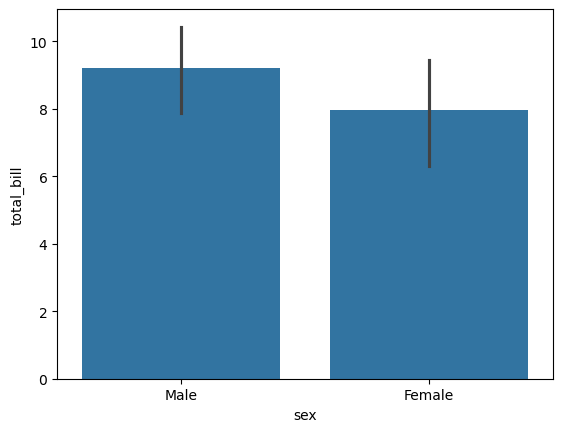

In [4]:
sns.barplot(x = 'sex', y = 'total_bill', data = tips, estimator = np.std)

plt.show()

### ii) ***countplot***

***This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences.*** Which is why we only pass the x value:

***Syntax: sns.countplot(x = 'categorical_col', data = DataFrame)***

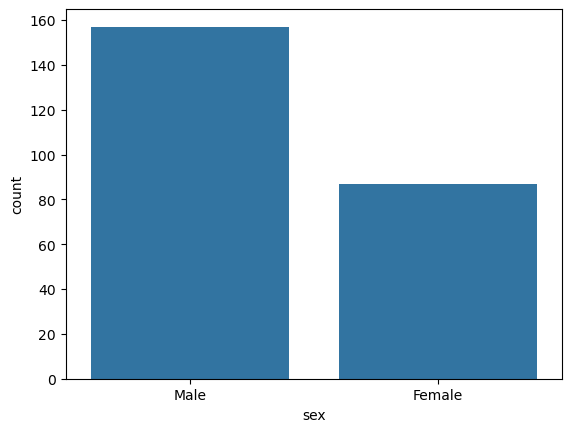

In [5]:
sns.countplot(x = 'sex', data = tips)

plt.show()

Here we can see there's more males in the dataset than females.

---

# 2) <u>boxplot and violinplot

### i) ***boxplot***

***Read section on boxplots in notebook: 44 - Matplotlib Part 3.***

- ***A boxplot shows the distribution of a numerical variable (shows median, quartiles, whiskers, outliers), often grouped by categories.***

- ***Gives an idea of spread(IQR, whiskers) + shape of the data for each category.***


[A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.]

***Syntax: sns.boxplot(x = 'categorical_col', y = 'numeric_col', data = DataFrame, hue = 'categorical_col', palette, orient = 'h')***

                            where;
                                    hue = Another categorical column
                                        hue splits up boxplots even further by adding in another categorical column.
                                    orient = 'h'
                                        Orientation of the plot (vertical or horizontal). It can be used
                                        to resolve ambiguity when both `x` and `y` are numeric or when
                                        plotting wide-form data.

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


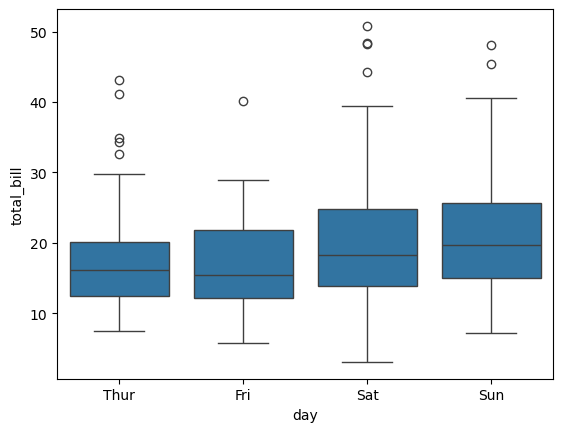

In [7]:
# Plots the distribution of total bill per day.

sns.boxplot(x = "day", y = "total_bill", data = tips)

plt.show()

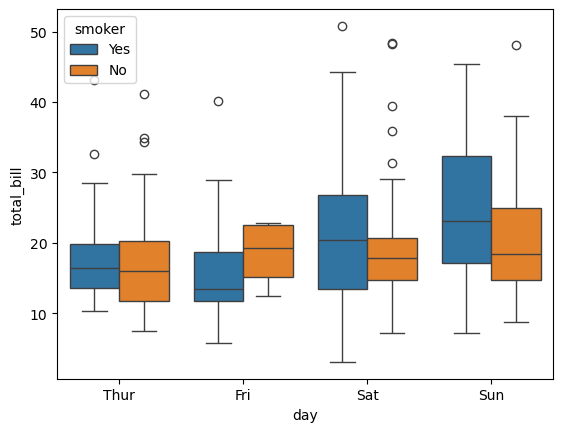

In [8]:
# Plots the distribution of total bill per day and also per smoker status.

sns.boxplot(x = "day", y = "total_bill", data = tips, hue = 'smoker')

plt.show()

- <u>NOTE:

    - We can see that basically people on Fridays tend to have a larger bill if they're not a smoker from the boxplot.

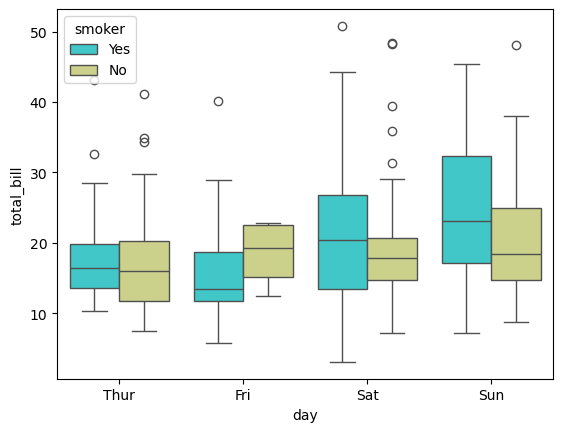

In [9]:
# Plots the distribution of total bill per day and also per smoker status.

sns.boxplot(x = "day", y = "total_bill", data = tips, hue = 'smoker', palette = 'rainbow')

plt.show()

- <u>NOTE:

    - Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0.

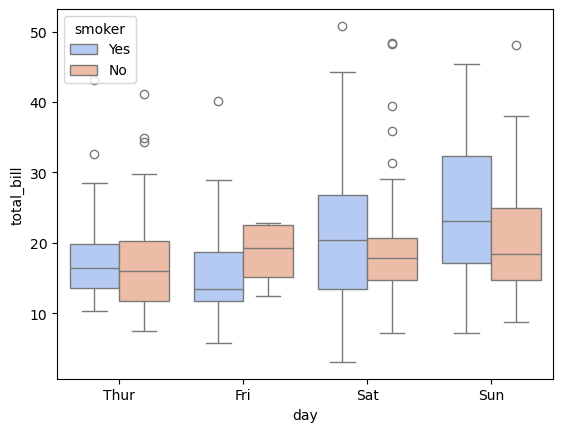

In [10]:
# Plots the distribution of total bill per day and also per smoker status.

sns.boxplot(x = 'day', y = 'total_bill', data = tips, hue = 'smoker', palette = 'coolwarm')

plt.show()

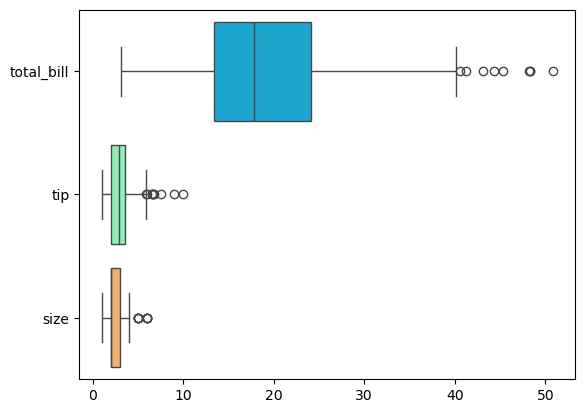

In [11]:
# Can do entire DataFrame.
# orient = 'h'
# i understand better with orient = 'v'

sns.boxplot(data = tips, palette = 'rainbow', orient = 'h')

plt.show()

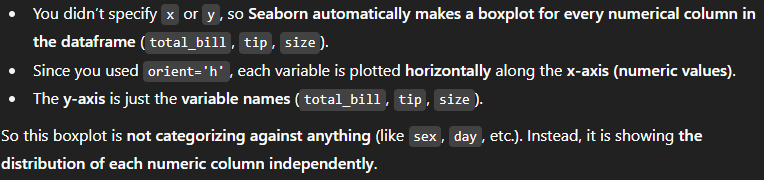

### ii) ***violinplot***

A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. ***Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.***

***Read about kde(kernel density estimation) in the previous notebook.***

    kdeplot estimates the probability density function of the data.

***Violinplot interpretation with an example diagram:***

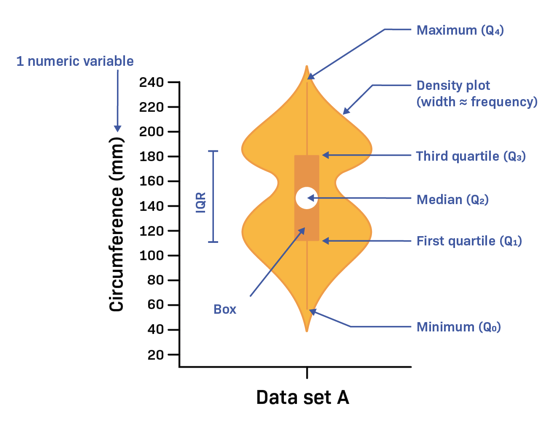

    - ***The width of the violin = density of data.***
        Where it’s wider, more total_bill values will occur there. Where it’s narrow, fewer values.
        For example, If the violin is narrow near the median, that means fewer data points are concentrated exactly around the median.
        This crucial information can't be shown by a boxplot.
    - The middle white dot = median.
    - The thick black bar = interquartile range (IQR).
    - The thin black line = whiskers.

***Syntax: sns.voilinplot(x = 'categorical_col', y = 'numeric_col', data = DataFrame, hue = 'categorical_col', palette, orient = 'h', split = bool)***

                            where;
                                    hue = Another categorical column
                                        hue splits up voilinplot even further by adding in another categorical column.
                                    orient = 'h'
                                        Orientation of the plot (vertical or horizontal). It can be used
                                        to resolve ambiguity when both `x` and `y` are numeric or when
                                        plotting wide-form data.

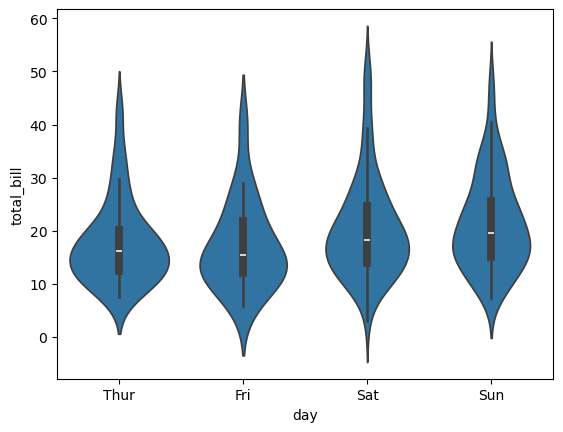

In [12]:
# Plots the distribution of total bill per day.

sns.violinplot(x = 'day', y = 'total_bill', data = tips)

plt.show()

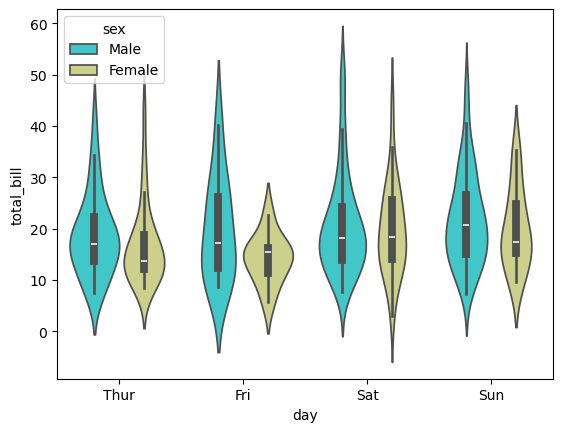

In [13]:
# Plots the distribution of total bill per day and also per sex.
# Can take the palette parameter.

sns.violinplot(x = 'day', y = 'total_bill', data = tips, hue = 'sex', palette = 'rainbow')

plt.show()

***split = bool parameter.***

    Instead of putting two violinplots next to each other, Seaborn splits one violin in half:

        - Left half = distribution for Males
        - Right half = distribution for Females
        - This makes it easier to compare two groups directly on the same axis.

    NOTE:

        - By default, most libraries (like Seaborn, Matplotlib, R) mirror the KDE curve on both sides of the axis → 
            this makes the “violin” shape.
        - The full width (left + right) at that height corresponds to the KDE density.
        - The half width (just one side) is the raw KDE value (scaled).

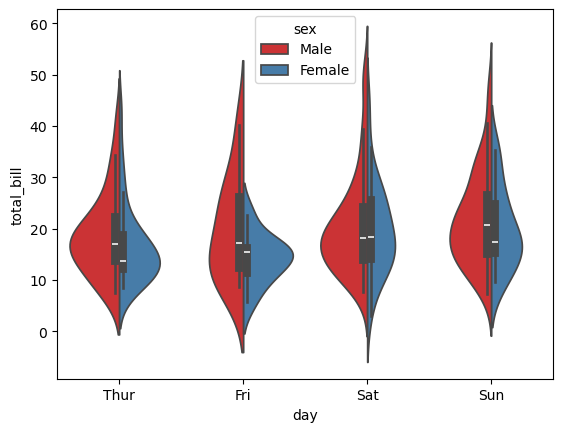

In [14]:
# Plots the distribution of total bill per day and also per sex.

sns.violinplot(x = 'day', y = 'total_bill', data = tips, hue = 'sex', split = True, palette = 'Set1')

plt.show()

---

# 3) <u>stripplot and swarmplot

### i) ***stripplot***

- The stripplot will draw a scatterplot where one variable is categorical.

- ***A strip plot, is simply a scatter plot of individual data points along the categorical axis.*** Each dot represents one observation from the dataset.

- ***Syntax: sns.stripplot(x = 'categorical_col', y = 'numeric_col', data = DataFrame, jitter = True, hue = 'categorical_col', palette)***

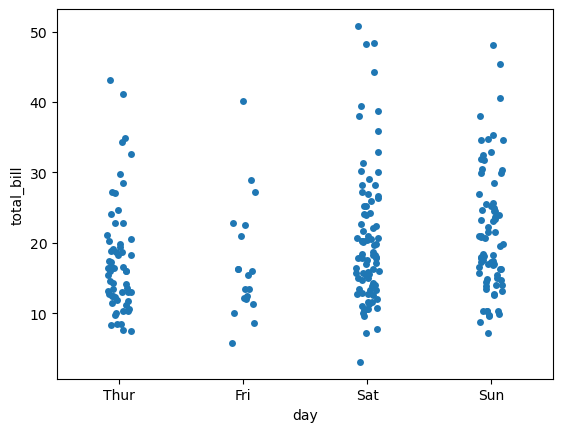

In [15]:
# Plots the distribution of total bill per day.

sns.stripplot(x = 'day', y = 'total_bill', data = tips)

plt.show()

- ***jitter = bool parameter:*** Adds random noise to separate some of the stacked data points.

- <u>NOTE:

    - One issue with the stripplot is that we can't really tell how many points are stacked on top of each other, if jitter = False.
    - By default jitter = True, hence the data points won't be stacked on top of each other.

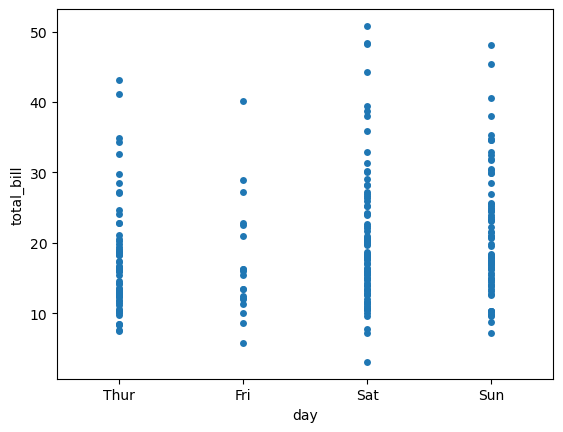

In [16]:
# Plots the distribution of total bill per day.

sns.stripplot(x = 'day', y = 'total_bill', data = tips, jitter = False)

plt.show()

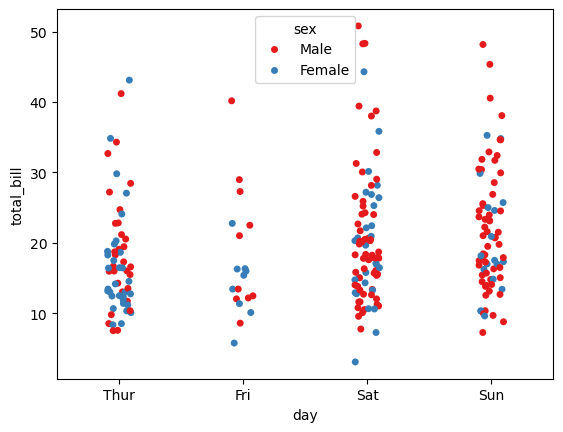

In [17]:
# Plots the distribution of total bill per day and also per sex.
# Can take the palette parameter.

sns.stripplot(x = 'day', y = 'total_bill', data = tips, hue = 'sex', palette = 'Set1')

plt.show()

- <u>NOTE:
        
    Now a plot like this may be hard to interpret versus a simple boxplot or even a violinplot.

### ii) ***swarmplot***

- We can combine a stripplot and a violinplot to create a swarm plot.

- ***In a Seaborn swarmplot, every point in the dataset is shown (like in a scatter plot), but the points are adjusted horizontally (jittered along the categorical axis) so they don’t overlap.***

    - And this actually gives a better representation of the distribution of values.

    - If there are more data points for a category, the swarm will spread out wider.

    - If there are fewer data points, swarm will appear narrower.

    - So, the width of the swarm indirectly reflects the local density of points.

    - But note that unlike a violinplot (which explicitly encodes density using KDE width), the swarmplot just stacks/jitters the points — it’s a visualization of raw data distribution, not a smoothed density function.

    -  Note that swarmplot does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

    - Hence we shouldn't use swarmplots for a very large datasets.

***Syntax: sns.swarmplot(x = 'categorical_col', y = 'numeric_col', data = DataFrame,, hue = 'categorical_col', palette)***

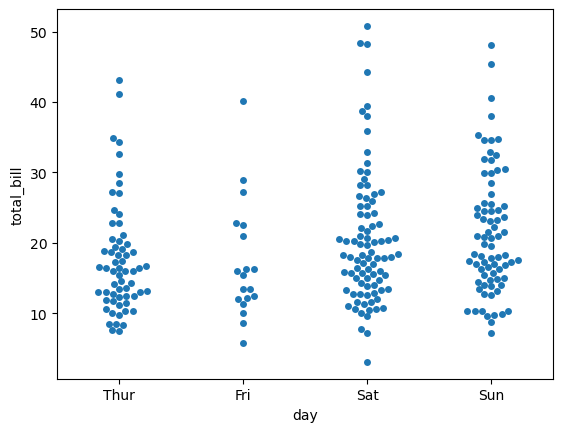

In [18]:
# Plots the distribution of total bill per day.

sns.swarmplot(x = 'day', y = 'total_bill', data = tips)

plt.show()

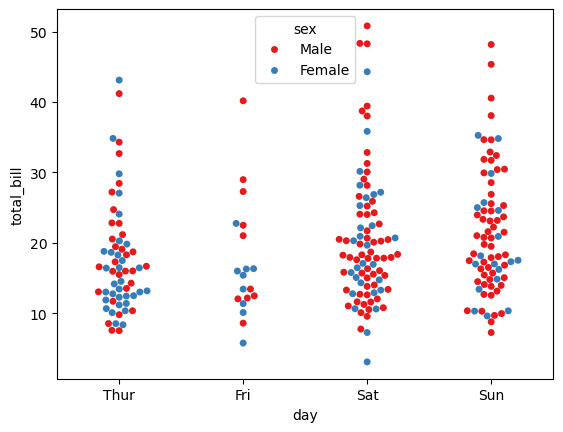

In [19]:
# Plots the distribution of total bill per day and also per sex.
# Can take the palette parameter.

sns.swarmplot(x = 'day', y = 'total_bill', data = tips, hue = 'sex', palette = 'Set1')

plt.show()

---

# 4) <u>Combining Categorical Plots.

***We can actually combine the swarmplot with a violinplot to show both pieces of information stacked on top of each other.***

In [20]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


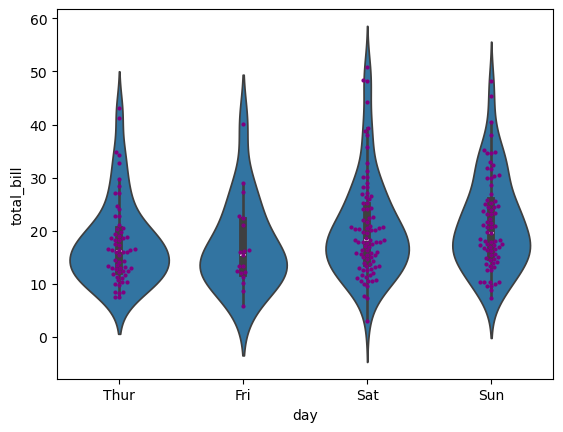

In [21]:
# Plots the distribution of total bill per day.
# size = Radius of the markers, in points.
# color = matplotlib color

sns.violinplot(x = 'day', y = 'total_bill', data = tips)
sns.swarmplot(x = 'day', y = 'total_bill', data = tips, color = 'purple', size = 3)

plt.show()

- <u>NOTE:

    - We can pass in a hue argument for both the plots we are trying to combine(Ex: voilinplot and swarmplot) but it results in the swarmplot not being on top of the voilinplot.

---

# 5) <u>catplot

***catplot is the most general form of a categorical plot. It can take in a <u>kind</u> parameter to adjust the plot type:***

kind parameter decides what type of categorical plot we want:

    - 'bar'
    - 'count'
    - 'box'
    - 'violin'
    - 'strip'
    - 'swarm'

***Syntax: sns.catplot(x = 'categorical_col', y = 'numeric_col', data = DataFrame,, hue = 'categorical_col', kind, palette)***

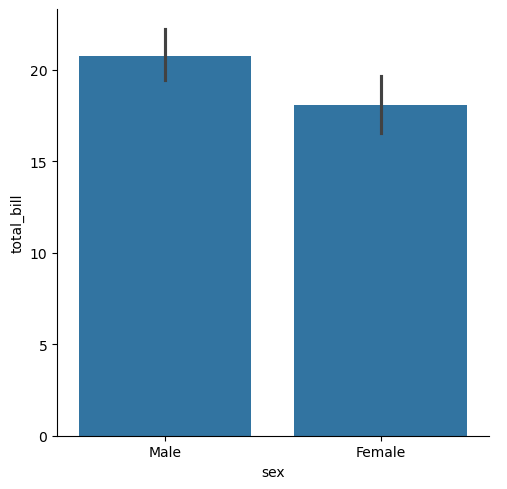

In [22]:
# Plots the distribution of total bill per sex.

sns.catplot(x = 'sex', y = 'total_bill', data = tips, kind = 'bar')

plt.show()

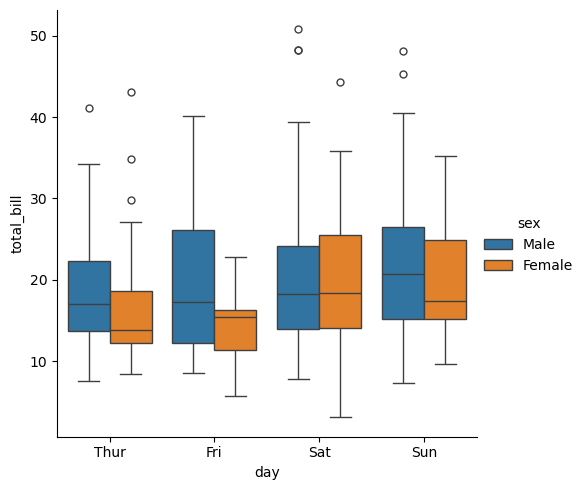

In [23]:
# Plots the distribution of total bill per day and also per sex.

sns.catplot(x = 'day', y = 'total_bill', data = tips, hue = 'sex', kind = 'box')

plt.show()

- <u>NOTE:

    - It's better to call the plot itself, example: barplot.
    - factorplot was depriciated, use catplot.

---